## Basics

- Calculate the expectation of $f(x)$ w.r.t $p(x)$ (distribution)

$$
\mathbb{E}[f(x)]=\int f(x)p(x)dx
$$

- When sampling from $P$ is difficult,  it is better to turn from **Analytical Solutions** to **Numerical Solutions**.

$$
\mathbb{E}[f(x)] \approx \frac{1}{N}\sum_i f(x_i)_{x_i\sim p(x)}
$$

- At this time, $q(x)$ (also a probability distribution, easy to sample) is introduced to indirect calculation：
    - $q(x)$: importance/ proposal distribution
    - $w(x)=\frac{p(x)}{q(x)}$: importance weights
$$
\begin{split}
\mathbb{E}_p[f(x)]&=\int f(x)\frac{p(x)}{q(x)}q(x)dx\\
&=\int f(x)w(x)q(x)dx, \qquad w(x)=\frac{p(x)}{q(x)}\\
&=\mathbb{E}_q[f(x)w(x)]\\
&\approx\frac{1}{N}\sum_i^Nf(x_i)w(x_i)_{x_i\sim q(x)}
\end{split}
$$




## Realize Importance Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp

- Normal Distribution & Uniform Distribution
    - $p(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$
        - $\log p(x)=-\frac12\left(\frac{x-\mu}{\sigma}\right)^2$
    
    - $q(x)=\frac{1}{b-a}$
        - $\log q(x)=-\log (b-a)$
    
- $w_i=\frac{p(x_i)}{q(x_i)}, \log w_i=\log p(x_i)-\log q(x_i)$ <- *The division may cause the overflow problem, therefore we use "log"*.
    - $w_i=\frac{\exp(w_i)}{\sum_j\exp(w_j)}$ <- *Softmax operation to make sure the sum of weights equals "1"*
    - $\log w_i=w_i-\log\sum_j\exp(w_j)$


In [2]:
class Pdf:
    def __call__(self, x):
        '''log prob'''
        pass
    def sample(self, n):
        pass

# Target Distribution
class Norm(Pdf):
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma
        
    def __call__(self, x):
        return -0.5*(x-self.mu)**2/self.sigma**2
    

# Importance/ Proposal Distribution
class Uniform(Pdf):
    def __init__(self, low, high):
        self.low = low
        self.high = high
    def __call__(self, x):
        return np.repeat(-np.log(self.high - self.low), len(x))
    def sample(self, n):
        return np.random.uniform(self.low, self.high, n)

In [3]:
class ImportanceSampler:
    def __init__(self, p_dist, q_dist):
        self.p_dist = p_dist
        self.q_dist = q_dist
        
    def sample(self, n):
        samples = self.q_dist.sample(n) # Generate n random numbers following q
        weights = self.calc_weights(samples) # Unnormalized weights
        norm_weights = weights - logsumexp(weights) # Normalized weights
        return samples, norm_weights
    def calc_weights(self, samples):
        # log w_i
        return self.p_dist(samples) - self.q_dist(samples)

In [4]:

target_p = Norm() #<- target distribution
imp_q = Uniform(-20, 30)
sampler = ImportanceSampler(target_p, imp_q)


Two ways to recover the distribution p.
1. **np.random.choice**
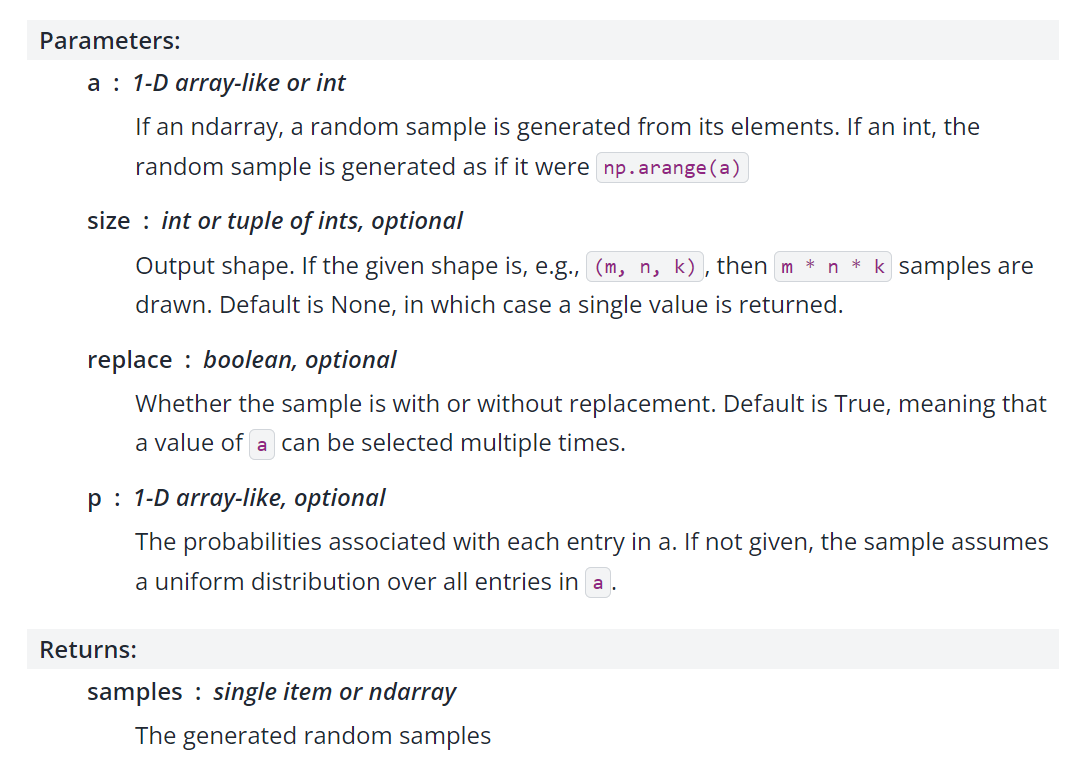
2. **plt.hist(biased_samples, bins=50, density = True, weights =np.exp(ws))**
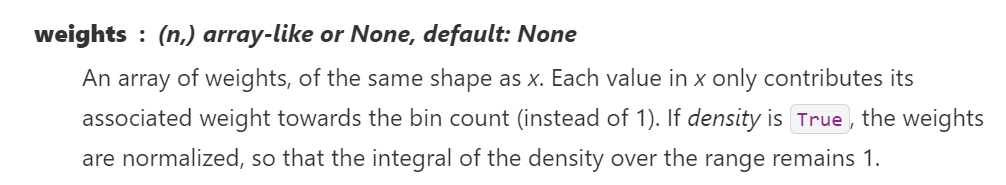

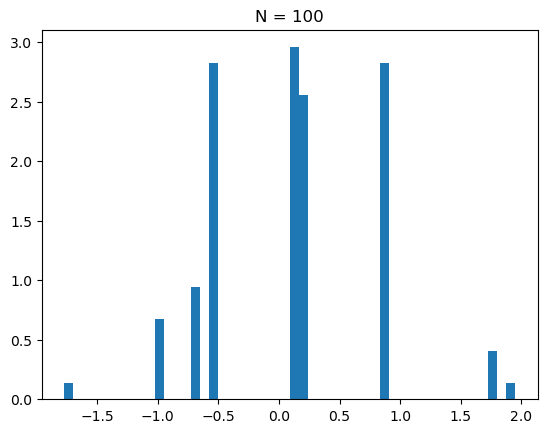

In [5]:
N = 100
biased_samples, ws = sampler.sample(N)
samples = np.random.choice(biased_samples, N, p=np.exp(ws))
_ = plt.hist(samples, bins=50, density = True)
plt.title(f"N = {N}");

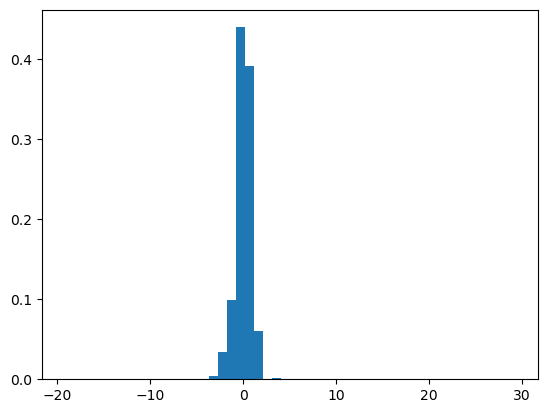

In [6]:
_= plt.hist(biased_samples, bins=50, density = True, weights =np.exp(ws))

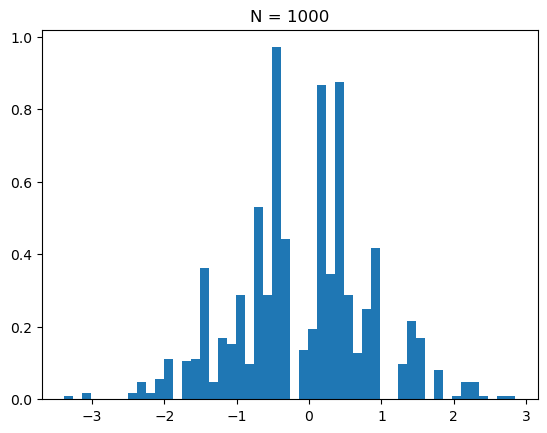

In [7]:
N = 1000
biased_samples, ws = sampler.sample(N)
samples = np.random.choice(biased_samples, N, p=np.exp(ws))
_ = plt.hist(samples, bins=50, density = True)
plt.title(f"N = {N}");

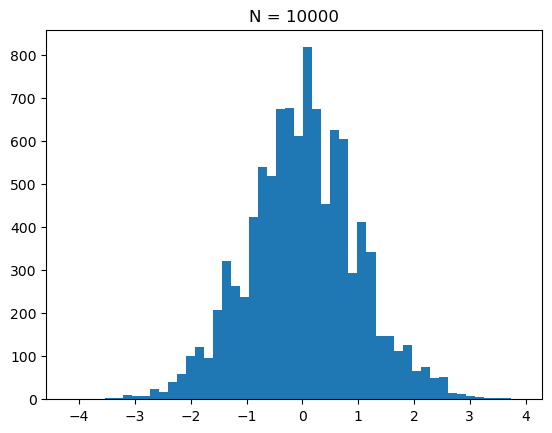

In [8]:
N = 10000
biased_samples, ws = sampler.sample(N)
samples = np.random.choice(biased_samples, N, p=np.exp(ws))
_ = plt.hist(samples, bins=50)
plt.title(f"N = {N}");

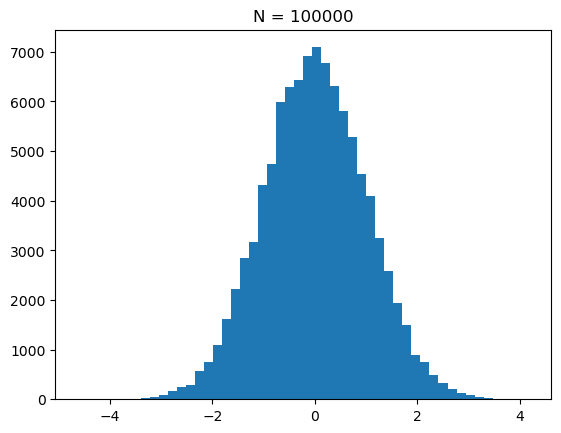

In [9]:
N = 100000
biased_samples, ws = sampler.sample(N)
samples = np.random.choice(biased_samples, N, p=np.exp(ws))
_ = plt.hist(samples, bins=50)
plt.title(f"N = {N}");

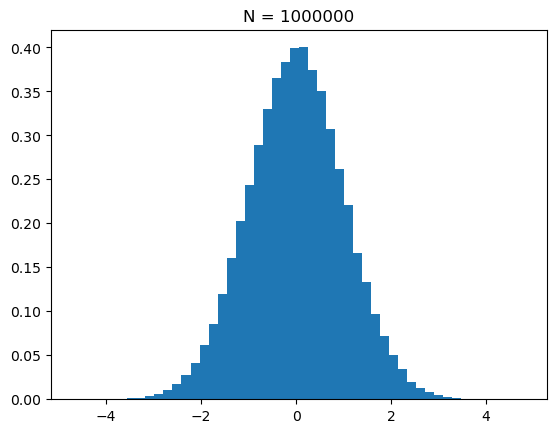

In [10]:
N = 1000000
biased_samples, ws = sampler.sample(N)
samples = np.random.choice(biased_samples, N, p=np.exp(ws))
_ = plt.hist(samples, bins=50, density = True)
plt.title(f"N = {N}");

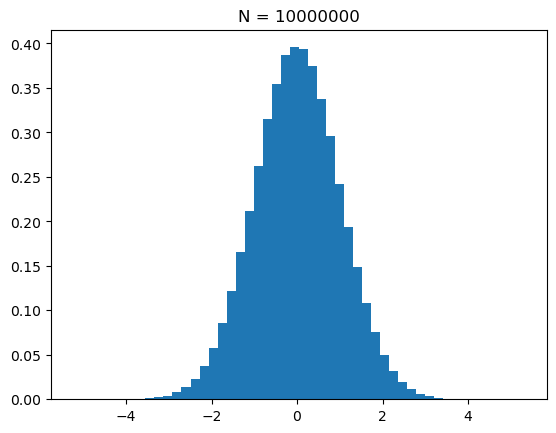

In [11]:
N = 10000000
biased_samples, ws = sampler.sample(N)
samples = np.random.choice(biased_samples, N, p=np.exp(ws))
_ = plt.hist(samples, bins=50, density = True)
plt.title(f"N = {N}");